In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [2]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\python\US_Accidents_Dec20.csv")
print(df)

                ID    Source    TMC  Severity           Start_Time  \
0              A-1  MapQuest  201.0         3  2016-02-08 05:46:00   
1              A-2  MapQuest  201.0         2  2016-02-08 06:07:59   
2              A-3  MapQuest  201.0         2  2016-02-08 06:49:27   
3              A-4  MapQuest  201.0         3  2016-02-08 07:23:34   
4              A-5  MapQuest  201.0         2  2016-02-08 07:39:07   
...            ...       ...    ...       ...                  ...   
4229389  A-4239402      Bing    NaN         2  2019-08-23 18:03:25   
4229390  A-4239403      Bing    NaN         2  2019-08-23 19:11:30   
4229391  A-4239404      Bing    NaN         2  2019-08-23 19:00:21   
4229392  A-4239405      Bing    NaN         2  2019-08-23 19:00:21   
4229393  A-4239406      Bing    NaN         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  ...  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN  ... 

In [3]:
print(df.columns)

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [4]:
colsToDelete = ['ID', 'Source', 'TMC', 'Start_Time', 'End_Time',
                'End_Lat', 'End_Lng', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
                'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp']
df = df.drop(colsToDelete, axis=1).dropna()
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3,40.100590,-82.925194,0.01,37.9,35.5,97.0,29.63,7.0,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
9,3,40.100590,-82.925194,0.01,37.4,33.8,100.0,29.62,3.0,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
11,3,39.932709,-82.830910,0.01,37.4,33.8,100.0,29.62,3.0,SSW,...,False,False,False,False,False,False,Day,Day,Day,Day
14,2,39.972038,-82.913521,0.01,37.4,33.8,100.0,29.62,3.0,SSW,...,False,False,False,False,True,False,Day,Day,Day,Day
20,2,40.052509,-82.882332,0.00,33.8,29.6,100.0,29.62,2.0,NNW,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
print(df.dtypes)

Severity                   int64
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout                  bool
Station                     bool
Stop                        bool
Traffic_Calming             bool
Traffic_Signal              bool
Turning_Loop                bool
Sunrise_Sunset            object
Civil_Twilight            object
Nautical_Twilight         object
Astronomical_Twilight     object
dtype: obj

In [6]:
def findIndex(x, lst=[]):
    for i in range(len(lst)):
        if(lst[i]==x):
            return i


In [7]:
WindDirections        = list( df["Wind_Direction"].unique() )
WeatherConditions     = list( df["Weather_Condition"].unique() )
SunriseSunsets        = list( df["Sunrise_Sunset"].unique() )
CivilTwilights        = list( df["Civil_Twilight"].unique() )
NauticalTwilights     = df["Nautical_Twilight"].unique()
AstronomicalTwilights = df["Astronomical_Twilight"].unique()

In [8]:
for i in WindDirections:
    df["Wind_Direction"][ df["Wind_Direction"]==i ] = findIndex(i, WindDirections)
for i in WeatherConditions:
    df["Weather_Condition"][ df["Weather_Condition"]==i ] = findIndex(i, WeatherConditions)
for i in SunriseSunsets:
    df["Sunrise_Sunset"][ df["Sunrise_Sunset"]==i ] = findIndex(i, SunriseSunsets)
for i in CivilTwilights:
    df["Civil_Twilight"][ df["Civil_Twilight"]==i ] = findIndex(i, CivilTwilights)
for i in NauticalTwilights:
    df["Nautical_Twilight"][ df["Nautical_Twilight"]==i ] = findIndex(i, NauticalTwilights)
for i in AstronomicalTwilights:
    df["Astronomical_Twilight"][ df["Astronomical_Twilight"]==i ] = findIndex(i, AstronomicalTwilights)

df.head()

<ipython-input-8-7fff54d13737>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Wind_Direction"][ df["Wind_Direction"]==i ] = findIndex(i, WindDirections)
<ipython-input-8-7fff54d13737>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Weather_Condition"][ df["Weather_Condition"]==i ] = findIndex(i, WeatherConditions)
<ipython-input-8-7fff54d13737>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sunrise_Sunset"][ df["Sunris

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3,40.100590,-82.925194,0.01,37.9,35.5,97.0,29.63,7.0,0,...,False,False,False,False,False,False,0,0,0,0
9,3,40.100590,-82.925194,0.01,37.4,33.8,100.0,29.62,3.0,0,...,False,False,False,False,False,False,0,0,0,0
11,3,39.932709,-82.830910,0.01,37.4,33.8,100.0,29.62,3.0,0,...,False,False,False,False,False,False,0,0,0,0
14,2,39.972038,-82.913521,0.01,37.4,33.8,100.0,29.62,3.0,0,...,False,False,False,False,True,False,0,0,0,0
20,2,40.052509,-82.882332,0.00,33.8,29.6,100.0,29.62,2.0,1,...,False,False,False,False,False,False,0,0,0,0


In [9]:
cols = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station",
        "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
for column in cols:
    lst = []
    for i in df[column]:
        lst.append(1 if(i) else 0)
    df[column] = lst

df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3,40.100590,-82.925194,0.01,37.9,35.5,97.0,29.63,7.0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,40.100590,-82.925194,0.01,37.4,33.8,100.0,29.62,3.0,0,...,0,0,0,0,0,0,0,0,0,0
11,3,39.932709,-82.830910,0.01,37.4,33.8,100.0,29.62,3.0,0,...,0,0,0,0,0,0,0,0,0,0
14,2,39.972038,-82.913521,0.01,37.4,33.8,100.0,29.62,3.0,0,...,0,0,0,0,1,0,0,0,0,0
20,2,40.052509,-82.882332,0.00,33.8,29.6,100.0,29.62,2.0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df = df.astype("float")

In [11]:
lat = df["Start_Lat"]
lng = df["Start_Lng"]
X   = df.drop(["Start_Lat", "Start_Lng"], axis=1)

X.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
5,3.0,0.01,37.9,35.5,97.0,29.63,7.0,0.0,3.5,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.0,0.01,37.4,33.8,100.0,29.62,3.0,0.0,4.6,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,3.0,0.01,37.4,33.8,100.0,29.62,3.0,0.0,4.6,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2.0,0.01,37.4,33.8,100.0,29.62,3.0,0.0,4.6,0.02,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20,2.0,0.00,33.8,29.6,100.0,29.62,2.0,1.0,4.6,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

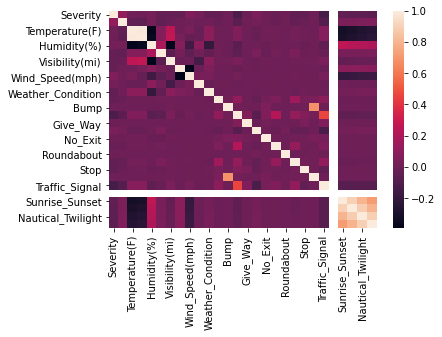

In [12]:
sns.heatmap(X.corr())

In [13]:
colsToDelete = []
corrMatrix = X.corr()
for i in corrMatrix.index:
    for j in corrMatrix.columns:
        if( abs(corrMatrix[i][j])>=0.2 and i!=j ):
            colsToDelete.append(i)
colsToDelete = list( pd.Series(colsToDelete).unique() )
X = X.drop(colsToDelete, axis=1)
X.head()

,Severity,Distance(mi),Pressure(in),Precipitation(in),Weather_Condition,Amenity,Give_Way,Junction,No_Exit,Roundabout,Station,Stop,Turning_Loop
5,3.0,0.01,29.63,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,3.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2.0,0.00,29.62,0.01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print(len(X.columns))

13


In [15]:
predictLat = LinearRegression().fit(X, lat)
predictLng = LinearRegression().fit(X, lng)

In [16]:
print( metrics.mean_squared_error(lat, predictLat.predict(X)) )

24.22748096533395


In [17]:
print( metrics.mean_squared_error(lng, predictLng.predict(X)) )

282.10962878277434


In [18]:
print( metrics.r2_score(lat, predictLat.predict(X)) )

0.05582993705398731


In [19]:
print( metrics.r2_score(lng, predictLng.predict(X)) )

0.06916985708897982


In [20]:
print( metrics.mean_squared_log_error(np.fabs(lat), np.fabs(predictLat.predict(X))) )

0.017996028464057533


In [21]:
print( metrics.mean_squared_log_error(np.fabs(lng), np.fabs(predictLng.predict(X))) )

0.029223937298986046


In [22]:
print( metrics.mean_absolute_error(lat, predictLat.predict(X)) )

4.0672835747600535


In [23]:
print( metrics.mean_absolute_error(lng, predictLng.predict(X)) )

14.46733118643526


In [24]:
newX = pd.DataFrame( PolynomialFeatures(degree=2).fit_transform(X) )
newX.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,1.0,3.0,0.01,29.63,0.03,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,0.01,29.62,0.02,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,0.00,29.62,0.01,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

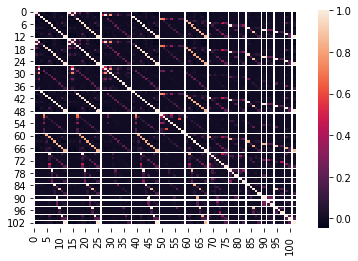

In [25]:
sns.heatmap(newX.corr())